# Advanced Querying

More advanced queries can be done to filter based on product lineage.

**Requirements:**

You need to run the following commands from the command line prior to launching jupyter notebook from the same terminal so that the required libraries and paths are set.

`module use /g/data/v10/public/modules/modulefiles` 

`module load dea`

In [1]:
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

import datacube
dc = datacube.Datacube(app='advance-query-example')

We can query the metadata for data that has been indexed but is not stored in the system, such as the Level 1 product.

Level 1 refers to a sensor radiance product, before it has been corrected for atmosphere.

In [2]:
scenes = dc.find_datasets(product='ls5_level1_scene', time=('1995-1-4', '1995-1-5'))
scenes

[Dataset <id=4fda1bcf-afcd-4cf4-bb6c-0cceae55d75e type=ls5_level1_scene location=/g/data/v10/reprocess/ls5/level1/1995/01/LS5_TM_OTH_P51_GALPGS01-002_089_080_19950104/ga-metadata.yaml>,
 Dataset <id=1cd1ca62-49e7-4b4f-90b8-5f5304b5e5b0 type=ls5_level1_scene location=/g/data/v10/reprocess/ls5/level1/1995/01/LS5_TM_OTH_P51_GALPGS01-002_089_082_19950104/ga-metadata.yaml>,
 Dataset <id=939e0fbe-9db6-4718-a04f-e571daa1ad30 type=ls5_level1_scene location=/g/data/v10/reprocess/ls5/level1/1995/01/LS5_TM_OTH_P51_GALPGS01-002_096_080_19950105/ga-metadata.yaml>,
 Dataset <id=204c71b0-49ed-4860-a1dd-d86d47ab201b type=ls5_level1_scene location=/g/data/v10/reprocess/ls5/level1/1995/01/LS5_TM_OTH_P51_GALPGS01-002_096_081_19950105/ga-metadata.yaml>,
 Dataset <id=75c4a0f1-cff4-4f43-bc18-5b57061cd2d4 type=ls5_level1_scene location=/g/data/v10/reprocess/ls5/level1/1995/01/LS5_TM_OTH_P51_GALPGS01-002_096_077_19950105/ga-metadata.yaml>,
 Dataset <id=9e67989a-1240-4ea2-ab83-3ca32be2fc40 type=ls5_level1_scen

There is scene-level metadata that we may want to use.

Landsat follows the WRS2 orbit, which gets broken up into paths and rows.

GQA stands for Geometric Quality Assesment, which is how well the image aligns with known points on the ground.
We will use the CEP90 field, which measures the Circular Error.

In [3]:
for scene in scenes:
    path = min(scene.metadata.sat_path)
    row =  min(scene.metadata.sat_row)
    gqa = scene.metadata.gqa_cep90
    print("path: {},\t row: {},\t error: {}".format(path,row, gqa))

path: 89,	 row: 80,	 error: 0.75
path: 89,	 row: 82,	 error: 0.92
path: 96,	 row: 80,	 error: 0.28
path: 96,	 row: 81,	 error: 0.48
path: 96,	 row: 77,	 error: 0.14
path: 96,	 row: 79,	 error: 0.44
path: 96,	 row: 83,	 error: 0.27
path: 96,	 row: 82,	 error: 0.23
path: 96,	 row: 84,	 error: 0.64
path: 96,	 row: 78,	 error: 0.26
path: 96,	 row: 76,	 error: 0.13
path: 96,	 row: 64,	 error: nan
path: 96,	 row: 74,	 error: 0.6
path: 96,	 row: 65,	 error: nan
path: 96,	 row: 66,	 error: nan
path: 96,	 row: 75,	 error: 0.19
path: 96,	 row: 72,	 error: 0.3
path: 96,	 row: 71,	 error: 0.75
path: 96,	 row: 70,	 error: 0.31
path: 96,	 row: 73,	 error: 0.22
path: 89,	 row: 78,	 error: 0.93
path: 89,	 row: 81,	 error: 0.96
path: 89,	 row: 89,	 error: 0.45
path: 89,	 row: 90,	 error: 0.59
path: 89,	 row: 79,	 error: 3.76
path: 114,	 row: 66,	 error: nan
path: 114,	 row: 79,	 error: 0.43
path: 114,	 row: 75,	 error: 4.66
path: 114,	 row: 74,	 error: 0.43
path: 114,	 row: 78,	 error: 0.4
path: 114,	 

If we only care about highly-aligned data, we can filter based on the gqa:

In [4]:
scenes = dc.find_datasets(product='ls5_level1_scene', time=('1995-1-4', '1995-1-5'), gqa_cep90=(0, 0.75))

for scene in scenes:
    path = min(scene.metadata.sat_path)
    row =  min(scene.metadata.sat_row)
    gqa = scene.metadata.gqa_cep90
    print("path: {},\t row: {},\t error: {}".format(path,row, gqa))

path: 96,	 row: 80,	 error: 0.28
path: 96,	 row: 81,	 error: 0.48
path: 96,	 row: 77,	 error: 0.14
path: 96,	 row: 79,	 error: 0.44
path: 96,	 row: 83,	 error: 0.27
path: 96,	 row: 82,	 error: 0.23
path: 96,	 row: 84,	 error: 0.64
path: 96,	 row: 78,	 error: 0.26
path: 96,	 row: 76,	 error: 0.13
path: 96,	 row: 74,	 error: 0.6
path: 96,	 row: 75,	 error: 0.19
path: 96,	 row: 72,	 error: 0.3
path: 96,	 row: 70,	 error: 0.31
path: 96,	 row: 73,	 error: 0.22
path: 89,	 row: 89,	 error: 0.45
path: 89,	 row: 90,	 error: 0.59
path: 114,	 row: 79,	 error: 0.43
path: 114,	 row: 74,	 error: 0.43
path: 114,	 row: 78,	 error: 0.4
path: 114,	 row: 77,	 error: 0.3
path: 114,	 row: 76,	 error: 0.29
path: 114,	 row: 80,	 error: 0.66


We can also query based on the path and row:

In [5]:
scenes = dc.find_datasets(product='ls5_level1_scene', time=('1995-1-4', '1995-1-5'), sat_path=114, sat_row=(77, 80))

for scene in scenes:
    path = min(scene.metadata.sat_path)
    row =  min(scene.metadata.sat_row)
    gqa = scene.metadata.gqa_cep90
    print("path: {},\t row: {},\t error: {}".format(path,row, gqa))

path: 114,	 row: 77,	 error: 0.3
path: 114,	 row: 79,	 error: 0.43
path: 114,	 row: 78,	 error: 0.4


## Using lineage

While we can query this metadata, we really want to use the available data product derived from this data, which is `ls5_nbar_albers`.

In [6]:
datasets = dc.find_datasets(product='ls5_nbar_albers', time=('1995-1-4', '1995-1-5'))
len(datasets)

272

In [7]:
d = dc.index.datasets.get(datasets[0].id, True)

In [8]:
def print_sources(d):
    print(d.type.name, ':', d.id)
    if d.sources is not None:
        for k, v in d.sources.items():
            print_sources(v)
            
print_sources(d)

ls5_nbar_albers : 5ce94ca0-3911-4e33-8fa3-f9db0c250e04
ls5_nbar_scene : 2e310aad-5c9d-4398-b5ba-978601aab0ed
ls5_level1_scene : 0ceeeb5f-5ce7-4df8-97fa-7131c422966b
ls5_satellite_telemetry_data : c8af077c-8353-11e5-8bc4-ac162d791418


We can see from the lineage tree that the nbar albers product is derived from the nbar scene, which was produced from the Level 1 scene.

To define a filter on the lineage tree, that dataset must have a parent with those properties:

In [9]:
scene_filter = dict(product='ls5_level1_scene', 
                     time=('1995-1-4', '1995-1-5'),
                     sat_path=114, sat_row=(77, 79),
                    )

In [10]:
datasets = dc.find_datasets(product='ls5_nbar_albers', time=('1995-1-4', '1995-1-5'), source_filter=scene_filter)
len(datasets)

18

We can see the number of returned datasets is smaller, with only the datasets that fall in the given path/rows.

This will then limit the datasets that are used for data when used in a `load` function:

In [11]:
data = dc.load(product='ls5_nbar_albers', time=('1995-1-4', '1995-1-5'), 
               group_by='solar_day',
               source_filter=scene_filter,
               dask_chunks={'time': 1, 'x': 4000, 'y': 4000}
              )

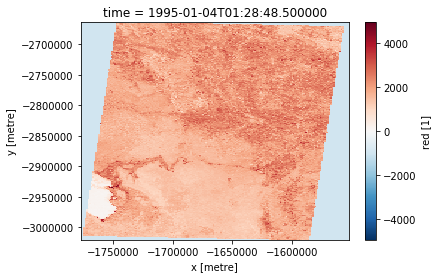

In [12]:
data.isel(time=0).red[::50, ::50].plot();

Here we can see that we only have data from the requested scenes, without specifying spatial dimensions.